<div style="display: flex; align-items: center;"> 
    <img src="static/imgdb.png" alt="Descrizione dell'immagine" width="120" height="120">
    <h1> API IGDB </h1>
</div>

IGDB è un database contenente miliardi di video games con descrizioni immagini valutazioni e tutto ciò che riguarda i video games

è possibile fare richieste tramite le API messe a disposizione di IGDB tramite i vari endpoint la documentazione è presente in questo sito https://api-docs.igdb.com/#getting-started

prima di utilizzare tali api bisognerà registrare un account su twitch, e successivamente creare la tua applicazione così da ottenere un client ID e la chiave API

<img src="static/twitch.png" alt="Descrizione dell'immagine" width="500" height="500">

dopo aver creato la tua applicazione, avrai ottenuto in id e il segreto token

<img src="static/token_key.jpeg" alt="Descrizione dell'immagine" width="500" height="400">

ora tramite la libreria request dovremmo ottenere l'access token con cui potremmo iniziare a fare richieste tramite gli endpoint

In [17]:
import requests

client_id = "yourclientid"
client_secret = "yourclientsecret"

def get_access_token(client_id, client_secret):

    url='https://id.twitch.tv/oauth2/token'
    params = {
        "client_id": client_id,
        "client_secret": client_secret,
        "grant_type": "client_credentials"
    }
    response = requests.post(url, params=params)

    if response.status_code == 200:
        return response.json().get("access_token")


potremmo salvare il contenuto del file json o prendere ciò che ci interessa ovvero l'access token tramite una funzione appropiata un esempio sopra ^

un esempio di richiesta che possiamo fare tramite queste api è la ricerca di statistiche e descrizione sul gioco tramite l'endpoint "games"

In [18]:
search_url = 'https://api.igdb.com/v4/games'

access_token=get_access_token(client_id, client_secret)

headers = {
    'Client-ID': client_id,
    'Authorization': f'Bearer {access_token}'
}


game_name = input("inserisci un nome di un gioco: ")
search_criteria = f'fields name,summary,rating, genres.name; where name="{game_name}";'

search_response = requests.post(search_url, headers=headers, data=search_criteria)

if search_response.status_code == 200 and len(search_response.json()) > 0:
    # Estrai i dettagli del primo gioco dalla risposta
    game_details = search_response.json()[0]

    # Stampa i dettagli del gioco
    print("Dettagli del gioco:")
    print(f"Nome: {game_details['name']}")
    print(f"Descrizione: {game_details['summary']}")
    print(f"Valutazione: {game_details['rating']}")
    print(f"genere: {game_details['genres']}")
else:
    print(f"Nessun gioco trovato con il nome: {game_name}")


un esempio di utilizzo avanzato di tali api è creare una lista di giochi da cui prelavare i vari dati disponibili su IGDB così da salvare il contenuto in un file json e creare tramite esso un dataframe


import pandas as pd
import json

search_url = 'https://api.igdb.com/v4/games'

headers = {
    'Client-ID': client_id,
    'Authorization': f'Bearer {access_token}'
}


game_names = ['Halo 4', 'Halo 3', 'The Witcher 3: Wild Hunt - Complete Edition', 'Halo 2', 'Dark Souls', 'The Legend of Zelda', 'Minecraft', 'Bloodborne: Game of the Year Edition', "Assassin's Creed", 'Call of Duty','Grand Theft Auto V: Special Edition']

game_data = []

for game_name in game_names:
    search_criteria = f'fields name,summary,total_rating; where name="{game_name}"; sort total_rating desc; limit 1;'
    search_response = requests.post(search_url, headers=headers, data=search_criteria)
    
    if search_response.status_code == 200 and len(search_response.json()) > 0:
        game_details = search_response.json()[0]
        game_data.append(game_details)


with open('game_data.json', 'w') as json_file:
    json.dump(game_data, json_file)

print("Dati dei giochi salvati in game_data.json")


una volta salvato il file json sarà possibile usare la libreria pandas per creare il nostro dataframe

In [19]:
import pandas as pd
df = pd.read_json('static/game_data.json')
df


,id,name,summary,total_rating
0,991,Halo 4,Halo 4 marks the start of an epic new saga wit...,82.950480
1,987,Halo 3,Halo 3 is a shooter game where players primari...,88.000699
2,119402,The Witcher 3: Wild Hunt - Complete Edition,"The Witcher 3: Wild Hunt is a story-driven, op...",93.347936
3,986,Halo 2,Halo 2 is the sequel to the highly successful ...,82.465296
4,2155,Dark Souls,An action RPG and spiritual sequel to Demon's ...,88.914174
5,1022,The Legend of Zelda,The Legend of Zelda is the first title in the ...,81.220705
6,121,Minecraft,Minecraft focuses on allowing the player to ex...,84.269750
7,42931,Bloodborne: Game of the Year Edition,"With new story details, learn the tale of hunt...",97.098197
8,128,Assassin's Creed,Assassin's Creed is a non-linear action-advent...,77.033151
9,621,Call of Duty,"The player has two primary weapon slots, a han...",84.248069


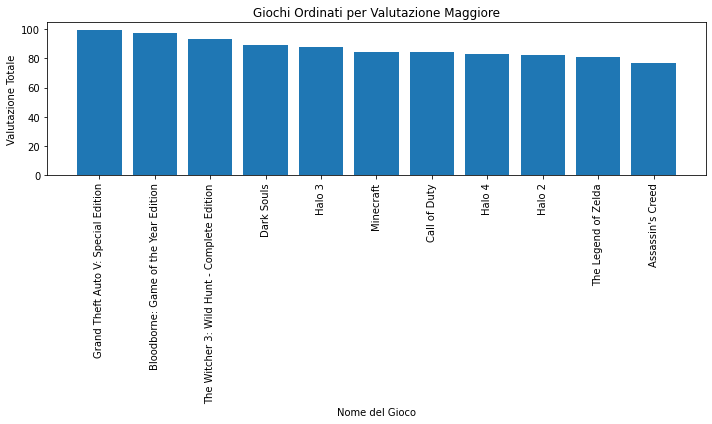

In [20]:
import matplotlib.pyplot as plt

df = df.sort_values(by='total_rating', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(df['name'], df['total_rating'])
plt.xlabel('Nome del Gioco')
plt.ylabel('Valutazione Totale')
plt.title('Giochi Ordinati per Valutazione Maggiore')
plt.xticks(rotation=90)  


plt.tight_layout()
plt.show()


potremmo usare queste statistiche per esempio per ricavarne un grafico così da individuare quali sono i giochi più valutati negli ultimi anni

si possono fare anche richieste per farti ritornarnare il genere dei giochi




search_url = 'https://api.igdb.com/v4/games'

headers = {
    'Client-ID': client_id,
    'Authorization': f'Bearer {access_token}'
}

game_name = input("Inserisci il nome di un gioco: ")
search_criteria = f'fields id,name,genres.name; where name="{game_name}";'

search_response = requests.post(search_url, headers=headers, data=search_criteria)

if search_response.status_code == 200 and len(search_response.json()) > 0:
    game_details = search_response.json()[0]

    if 'genres' in game_details:
        genres = [genre['name'] for genre in game_details['genres']]
        print(f"Genere/i: {', '.join(genres)}")
    else:
        print(f"Nessuna informazione sul genere per il gioco: {game_name}")
else:
    print(f"Nessun gioco trovato con il nome: {game_name}")



ora tramite un file in cui inserirò i giochi creerò un dataframe contenente i giochi con genere e valutazione e anno di uscità e compagnia che ha creato il gioco

import json
from datetime import datetime

search_url = 'https://api.igdb.com/v4/games'

headers = {
    'Client-ID': client_id,
    'Authorization': f'Bearer {access_token}'
}

games_details_list = []

with open("/static/nomi_giochi.txt", "r") as file:
    game_names = [line.strip() for line in file]

for game_name in game_names:
    search_criteria = f'fields id,name,genres.name,rating,release_dates.date,involved_companies.company.name; where name="{game_name}";'

    
    search_response = requests.post(search_url, headers=headers, data=search_criteria)

   
    if search_response.status_code == 200 and len(search_response.json()) > 0:
   
        game_details = search_response.json()[0]

        if 'involved_companies' in game_details:
            companies = [company['company']['name'] for company in game_details['involved_companies']]
        else:
            companies = ['N/A']

        game_details['companies'] = companies

      
        games_details_list.append(game_details)
    else:
        print(f"No game found with the name: {game_name}")

output_filename = "games_details.json"
with open(output_filename, 'w') as json_file:
    json.dump(games_details_list, json_file, indent=2)

print(f"Game details have been saved to '{output_filename}'")


In [22]:
import pandas as pd
import json

with open("static/games_details.json", "r") as json_file:
    games_details_list = json.load(json_file)


data = {'Name': [], 'Genres': [], 'Rating': [], 'ReleaseDate': [], 'Companies': []}

for game_details in games_details_list:

    name = game_details.get('name', 'N/A')


    if 'genres' in game_details:
        genres = [genre['name'] for genre in game_details['genres']]
    else:
        genres = ['N/A']

 
    rating = game_details.get('rating', 'N/A')

  
    release_dates = game_details.get('release_dates', [])
    if release_dates:
        timestamp = release_dates[0].get('date', None)
        release_date = pd.to_datetime(timestamp, unit='s').strftime('%d-%m-%Y') if timestamp else 'N/A'
    else:
        release_date = 'N/A'

   
    companies = [company['company']['name'] if 'company' in company and 'name' in company['company'] and company['company']['name'] != 'N/A' else 'N/A' for company in game_details.get('involved_companies', [])]



    # Aggiungi i dettagli del gioco alla lista
    data['Name'].append(name)
    data['Genres'].append(', '.join(genres))
    data['Rating'].append(rating)
    data['ReleaseDate'].append(release_date)
    data['Companies'].append(', '.join(companies))

df = pd.DataFrame(data)

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

df

,Name,Genres,Rating,ReleaseDate,Companies
0,Dragon Ball Z: Kakarot - Dragon Ball Card Warr...,"Strategy, Turn-based strategy (TBS), Card & Bo...",100.000000,27-10-2020,"CyberConnect2, Bandai Namco Entertainment"
1,Persona 4 Golden,"Role-playing (RPG), Adventure, Visual Novel",95.234290,15-06-2012,"NIS America, Atlus USA, Atlus"
2,Sekiro: Shadows Die Twice - GOTY Edition,"Role-playing (RPG), Hack and slash/Beat 'em up...",97.338266,28-10-2020,"FromSoftware, Activision"
3,Leisure Suit Larry: Wet Dreams Dry Twice,"Point-and-click, Puzzle, Adventure",97.015714,23-10-2020,"Assemble Entertainment, CrazyBunch"
4,Tetris Effect: Connected,"Music, Puzzle, Indie, Arcade",92.957860,10-11-2020,"Monstars, Resonair, Stage Games, Enhance"
...,...,...,...,...,...
292,Syberia: The World Before,"Point-and-click, Puzzle, Adventure",78.329515,18-03-2022,"Koalabs Games, Microids"
293,Iron Lung,"Puzzle, Simulator, Adventure, Indie",78.139645,10-03-2022,David Szymanski
294,Brotato,"Shooter, Role-playing (RPG), Indie, Arcade",77.946318,27-09-2022,"Seaven Studio, Blobfish, Blobfish"
295,Lil Gator Game,"Platform, Adventure, Indie",71.023712,14-12-2022,"Playtonic Friends, MegaWobble"


In [23]:

df = df[df['ReleaseDate'] != 'N/A']
df = df[df['Genres'] != 'N/A']

df['ReleaseYear'] = pd.to_datetime(df['ReleaseDate'], format='%d-%m-%Y', errors='coerce').dt.year
df['main_genre'] = df['Genres'].str.split(',').str[0].str.strip()
df['main_company'] = df['Companies'].str.split(',').str[0].str.strip()

df

,Name,Genres,Rating,ReleaseDate,Companies,ReleaseYear,main_genre,main_company
0,Dragon Ball Z: Kakarot - Dragon Ball Card Warr...,"Strategy, Turn-based strategy (TBS), Card & Bo...",100.000000,27-10-2020,"CyberConnect2, Bandai Namco Entertainment",2020,Strategy,CyberConnect2
1,Persona 4 Golden,"Role-playing (RPG), Adventure, Visual Novel",95.234290,15-06-2012,"NIS America, Atlus USA, Atlus",2012,Role-playing (RPG),NIS America
2,Sekiro: Shadows Die Twice - GOTY Edition,"Role-playing (RPG), Hack and slash/Beat 'em up...",97.338266,28-10-2020,"FromSoftware, Activision",2020,Role-playing (RPG),FromSoftware
3,Leisure Suit Larry: Wet Dreams Dry Twice,"Point-and-click, Puzzle, Adventure",97.015714,23-10-2020,"Assemble Entertainment, CrazyBunch",2020,Point-and-click,Assemble Entertainment
4,Tetris Effect: Connected,"Music, Puzzle, Indie, Arcade",92.957860,10-11-2020,"Monstars, Resonair, Stage Games, Enhance",2020,Music,Monstars
...,...,...,...,...,...,...,...,...
292,Syberia: The World Before,"Point-and-click, Puzzle, Adventure",78.329515,18-03-2022,"Koalabs Games, Microids",2022,Point-and-click,Koalabs Games
293,Iron Lung,"Puzzle, Simulator, Adventure, Indie",78.139645,10-03-2022,David Szymanski,2022,Puzzle,David Szymanski
294,Brotato,"Shooter, Role-playing (RPG), Indie, Arcade",77.946318,27-09-2022,"Seaven Studio, Blobfish, Blobfish",2022,Shooter,Seaven Studio
295,Lil Gator Game,"Platform, Adventure, Indie",71.023712,14-12-2022,"Playtonic Friends, MegaWobble",2022,Platform,Playtonic Friends


tramite questi dati andrò a creare un boxplot sulla valutazione dei giochi

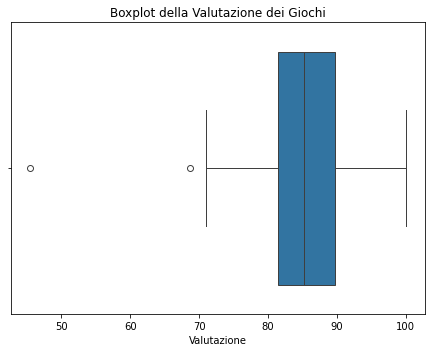

In [24]:
import json
import matplotlib.pyplot as plt
import seaborn as sns 

# Converte la colonna 'Rating' in formato numerico
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Creazione di un boxplot unico per tutte le valutazioni
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.boxplot(x='Rating', y=None, data=df) 
plt.xlabel('Valutazione')
plt.title('Boxplot della Valutazione dei Giochi')
plt.tight_layout()


Il boxplot è utile per identificare la centralità, la dispersione e la presenza di valori anomali nella distribuzione delle valutazioni dei giochi. Ad esempio, puoi vedere la mediana (linea nella scatola) e ottenere un'idea della dispersione dei dati e della presenza di valutazioni estreme.

Se la distribuzione è simmetrica e la scatola è centrata, significa che la maggior parte delle valutazioni si concentra intorno alla mediana. Se ci sono molti outliers, potrebbe esserci una variazione significativa nelle valutazioni, e potrebbe essere utile esaminare più dettagliatamente le ragioni di queste valutazioni estreme

sono risultati due outliers sotto i 70 meglio rimuoverli

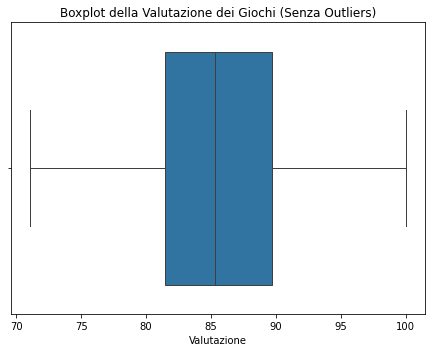

In [25]:
df_filtered = df[df['Rating'] >= 70]

plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.boxplot(x='Rating', y=None, data=df_filtered) 
plt.xlabel('Valutazione')
plt.title('Boxplot della Valutazione dei Giochi (Senza Outliers)')
plt.tight_layout()
plt.show()

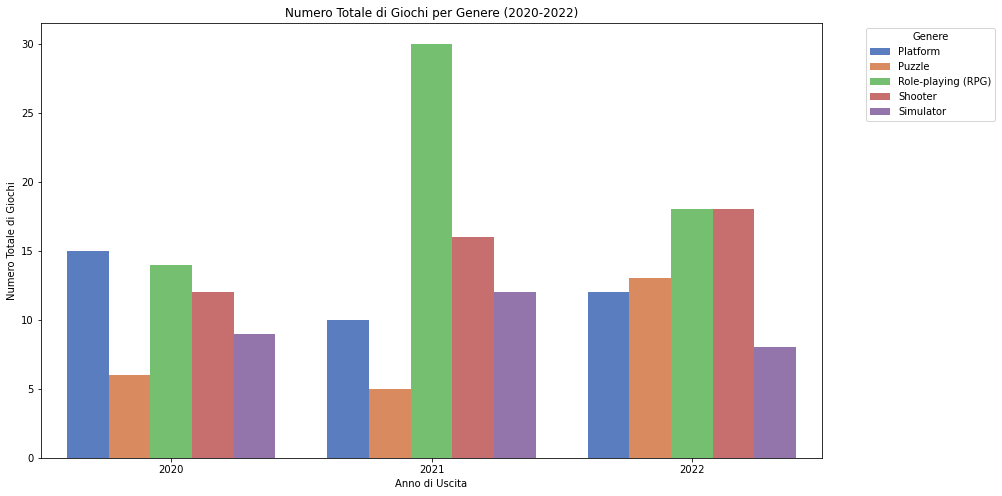

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df[df['ReleaseYear'].isin([2020, 2021, 2022])]

df_genre_count = df_filtered.groupby(['ReleaseYear', 'main_genre']).size().reset_index(name='GameCount')

top_genres = df_genre_count.groupby('main_genre')['GameCount'].sum().sort_values(ascending=False).head(5).index
df_top_genres = df_genre_count[df_genre_count['main_genre'].isin(top_genres)]
plt.figure(figsize=(14, 8))
sns.barplot(x='ReleaseYear', y='GameCount', hue='main_genre', data=df_top_genres, palette='muted')
plt.title('Numero Totale di Giochi per Genere (2020-2022)')
plt.xlabel('Anno di Uscita')
plt.ylabel('Numero Totale di Giochi')
plt.legend(title='Genere', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

questo grafico invece ci consente di capire quali sono le tendenze per genere di gioco negli anni 2020,2021,2022

data la scarsa presenza di dati all'interno del database di igdb, ho scaricato due dataset da Kaggle user_data set:https://www.kaggle.com/datasets/tamber/steam-video-games game_dataset: https://www.kaggle.com/datasets/trolukovich/steam-games-complete-dataset
e tramite essi ho tratto diverse conclusioni riguardo il rating dei diversi developers molto similmente a come ho fatto in precendenza con il dataset creato grazie alle api di igdb

In [1]:
import pandas as pd
percorso_file_csv = 'data/rawData/steam_users_purchase_play.csv'
df = pd.read_csv(percorso_file_csv)
df

,user_id,game_name,hours,purchase,play
0,151603712,The Elder Scrolls V Skyrim,273.0,1,1
1,151603712,Fallout 4,87.0,1,1
2,151603712,Spore,14.9,1,1
3,151603712,Fallout New Vegas,12.1,1,1
4,151603712,Left 4 Dead 2,8.9,1,1
...,...,...,...,...,...
128799,128470551,Fallen Earth,2.4,1,1
128800,128470551,Magic Duels,2.2,1,1
128801,128470551,Titan Souls,1.5,1,1
128802,128470551,Grand Theft Auto Vice City,1.5,1,1


Cerchiamo di valutare se i giochi più acquistati corrispondono ai giochi più giocati. Per ciascun gioco, calcoliamo il numero totale di utenti e il tempo totale in cui il gioco è stato giocato da tutti gli utenti. I risultati sono visualizzati nella tabella sottostante in ordine decrescente in base al numero di utenti, ciò per i primi 20 giochi con il maggior numero di utenti.

In [2]:
grouped_df = df.groupby('game_name').agg({'user_id': 'nunique', 'hours': 'sum'}).reset_index()

grouped_df = grouped_df.rename(columns={'user_id': 'total_users', 'hours': 'total_playtime'})
top_20_games = grouped_df.sort_values(by='total_users', ascending=False).head(20)
top_20_games

,game_name,total_users,total_playtime
1336,Dota 2,4841,981684.6
4257,Team Fortress 2,2323,173673.3
4788,Unturned,1563,16096.4
981,Counter-Strike Global Offensive,1412,322771.6
2074,Half-Life 2 Lost Coast,981,184.4
984,Counter-Strike Source,978,96075.5
2475,Left 4 Dead 2,951,33596.7
978,Counter-Strike,856,134261.1
4899,Warframe,847,27074.6
2071,Half-Life 2 Deathmatch,823,3712.9


Possiamo osservare che per alcuni giochi, esiste una relazione tra i più giocati e i più acquistati. Ad esempio, 'Dota 2' è innegabilmente il gioco più popolare, con il maggior numero di utenti e il maggior numero totale di ore giocate. Tuttavia, ciò non è sempre vero, un esempio interessante è 'Half-Life 2 Lost Coast', che ha un elevato numero di utenti (981 utenti), ma un totale di ore giocato piuttosto basso (184,4 ore). Una possibile spiegazione potrebbe essere che questo gioco è stato acquistato come parte di un pacchetto di giochi.

Utilizziamo un istogramma per visualizzare meglio i risultati mostrati nella tabella sopra. I titoli dei giochi sono ordinati in ordine decrescente in base al numero di utenti. La gradazione di colore rappresenta il totale delle ore giocate, dal più giocato al meno giocato.

/home/simone002/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


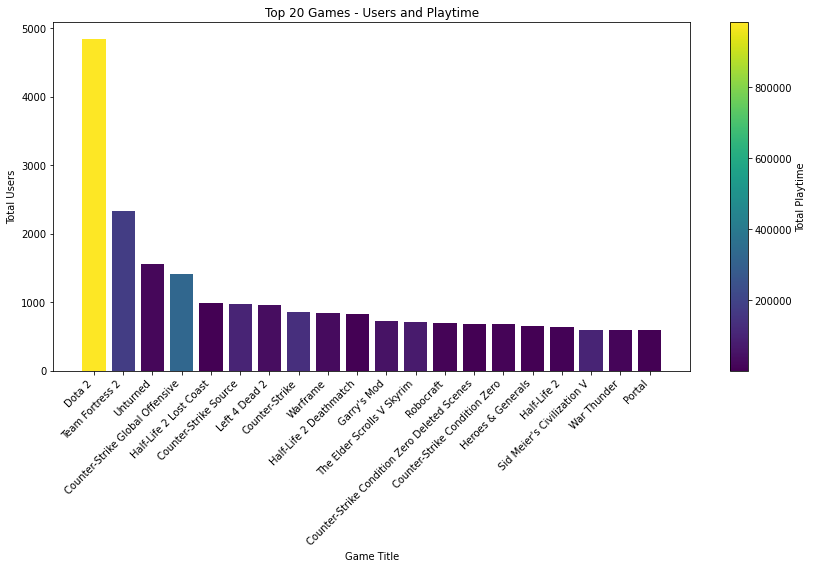

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

norm = Normalize(vmin=top_20_games['total_playtime'].min(), vmax=top_20_games['total_playtime'].max())
colors = cm.viridis(norm(top_20_games['total_playtime']))

plt.figure(figsize=(12, 8))
bars = plt.bar(top_20_games['game_name'], top_20_games['total_users'], color=colors)

plt.xlabel('Game Title')
plt.ylabel('Total Users')
plt.title('Top 20 Games - Users and Playtime')
plt.xticks(rotation=45, ha='right')

color_bar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), ax=plt.gca(), orientation='vertical')
color_bar.set_label('Total Playtime')

plt.tight_layout()
plt.show()

Possiamo chiaramente vedere che in alcuni casi non c'è alcuna relazione tra il numero totale di utenti e il totale delle ore giocate, il che significa che un elevato numero di utenti non corrisponde a un equivalente elevato totale di ore giocate.

Ricreiamo lo stesso tipo di grafico, ma questa volta considerando solo gli utenti che effettivamente hanno giocato ai giochi. Pertanto, per ogni gioco, abbiamo rimosso gli utenti che l'hanno acquistato ma non l'hanno mai giocato.

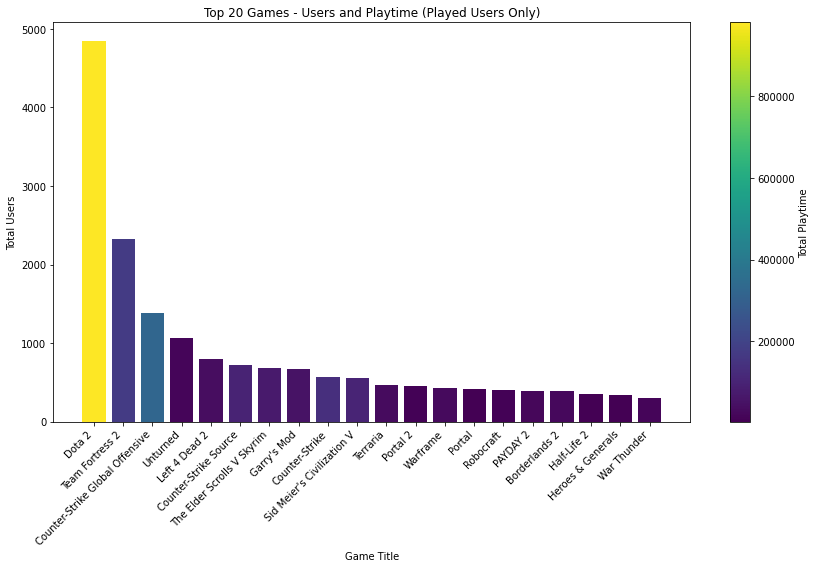

In [4]:
# Filtra il DataFrame originale considerando solo gli utenti che hanno effettivamente giocato
played_users_df = df[df['play'] == 1]

# Raggruppa per 'game_title' e calcola il numero totale di utenti e il tempo totale di gioco
played_grouped_df = played_users_df.groupby('game_name').agg({'user_id': 'nunique', 'hours': 'sum'}).reset_index()

played_grouped_df = played_grouped_df.rename(columns={'user_id': 'total_users', 'hours': 'total_playtime'})

played_top_20_games = played_grouped_df.sort_values(by='total_users', ascending=False).head(20)

played_norm = Normalize(vmin=played_top_20_games['total_playtime'].min(), vmax=played_top_20_games['total_playtime'].max())
played_colors = cm.viridis(played_norm(played_top_20_games['total_playtime']))

plt.figure(figsize=(12, 8))
played_bars = plt.bar(played_top_20_games['game_name'], played_top_20_games['total_users'], color=played_colors)

plt.xlabel('Game Title')
plt.ylabel('Total Users')
plt.title('Top 20 Games - Users and Playtime (Played Users Only)')
plt.xticks(rotation=45, ha='right')

played_color_bar = plt.colorbar(cm.ScalarMappable(norm=played_norm, cmap='viridis'), ax=plt.gca(), orientation='vertical')
played_color_bar.set_label('Total Playtime')

plt.tight_layout()
plt.show()


Nella comparazione di questo nuovo grafico con quello precedente, possiamo notare che alcuni giochi sono scesi dalla top 20 dei giochi basati sul numero di utenti. Ad esempio, 'Counter-Strike Condition Zero', che si trovava tra i primi 15 nel grafico considerando tutti gli utenti che hanno acquistato il gioco, non appare nella top 20 dei giochi considerando solo gli utenti che effettivamente hanno giocato al gioco. Un esempio opposto è quello di 'Terraria', che compare nel secondo grafico come top 11 ma non è elencato nel primo grafico. Come già menzionato, una possibile spiegazione di questa differenza potrebbe essere che diversi giochi sono stati acquistati come parte di un pacchetto di giochi.

Al fine di avere una migliore comprensione della distribuzione dei dati degli utenti e delle abitudini di gioco degli utenti, viene prodotto un box plot per i primi 20 giochi più giocati, basato sul totale delle ore giocate.

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_5351/728836297.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='game_name', y='hours', data=played_top_20_df, order=top_20_played_games, palette='viridis')


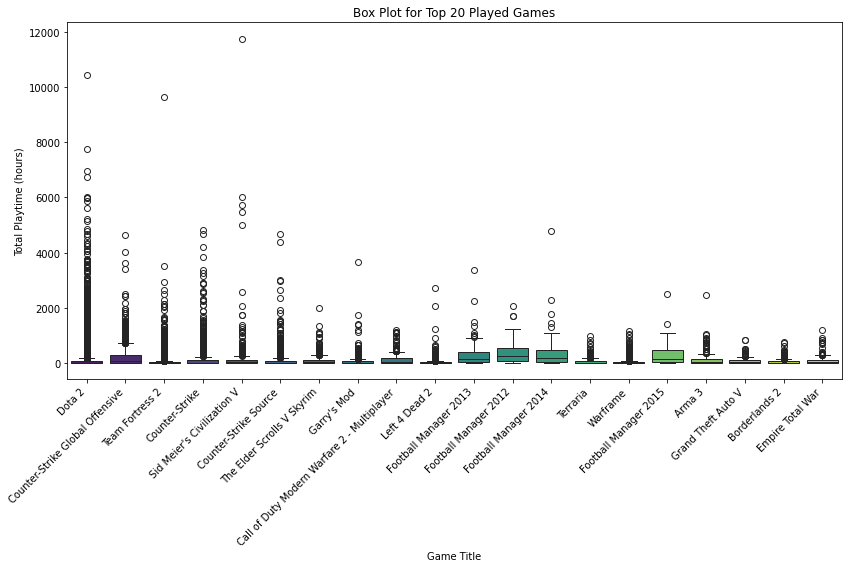

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra il DataFrame originale considerando solo gli utenti che hanno effettivamente giocato
played_users_df = df[df['play'] == 1]

# Raggruppa per 'game_title' e ottieni i 20 giochi più giocati
top_20_played_games = played_users_df.groupby('game_name')['hours'].sum().nlargest(20).index

played_top_20_df = played_users_df[played_users_df['game_name'].isin(top_20_played_games)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='game_name', y='hours', data=played_top_20_df, order=top_20_played_games, palette='viridis')
plt.xticks(rotation=45, ha='right')

plt.xlabel('Game Title')
plt.ylabel('Total Playtime (hours)')
plt.title('Box Plot for Top 20 Played Games')

plt.tight_layout()
plt.show()

Come possiamo osservare, la distribuzione dei dati per ciascun gioco considerato non è simmetrica. Inoltre, il 75% dei punti dati per ciascun gioco si trova nell'intervallo di centinaia di ore, con diversi giochi che presentano outliers molto elevati. Possiamo notare, ad esempio, che un utente ha giocato più di 10.000 ore a "Dota 2". Un altro esempio interessante è un utente che ha giocato quasi 12.000 ore a "Sid Meier's Civilization V".

adesso consideriamo un altro dataframe

Il secondo dataset è il dataset dei giochi. Esso contiene un elenco di giochi, le loro descrizioni, l'URL (che porta al negozio Steam), il tipo di pacchetto (app, bundle...), il titolo del gioco, una breve descrizione, recensioni recenti, tutte le recensioni, data di rilascio, sviluppatore, editore, tag popolari (Gore, Azione, Sparatutto, PvP...), dettagli del gioco (Multi-player, Single-player, Supporto completo del controller...), lingue, obiettivi, genere (Azione, Avventura, RPG, Strategia...), descrizione del gioco, descrizione dei contenuti maturi, requisiti minimi per eseguire il gioco, requisiti consigliati, prezzo originale e prezzo scontato. Ci sono un totale di 51.920 giochi nel dataset.

Per comprendere meglio come sono distribuite le recensioni dei giochi, ho rappresentato graficamente il numero di giochi con il rispettivo percentuale di recensioni positive.

In [6]:
import pandas as pd
percorso_file_csv = 'data/rawData/steam_games.csv'
dataGames = pd.read_csv(percorso_file_csv)
dataGames

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

import re

dataGames["review_qualification"] = ""
dataGames["percentage_positive_review"] = -1

for i, row in dataGames.iterrows():
    if type(row["all_reviews"]) == str:

        # extract % of positive reviews
        x = re.findall(r'- [0,1,2,3,4,5,6,7,8,9]*%', row["all_reviews"])
        if len(x) != 0:
            dataGames.at[i, 'percentage_positive_review'] = x[0].translate({ord(i): None for i in '- %'})

        # extract qualification of reviews
        reviewParse = row["all_reviews"].split(",")
        if 'user reviews' in reviewParse[0]:
            dataGames.at[i, 'review_qualification'] = ""
        else:
            dataGames.at[i, 'review_qualification'] = reviewParse[0]

possibleReview = dataGames["review_qualification"].unique()
print(possibleReview)

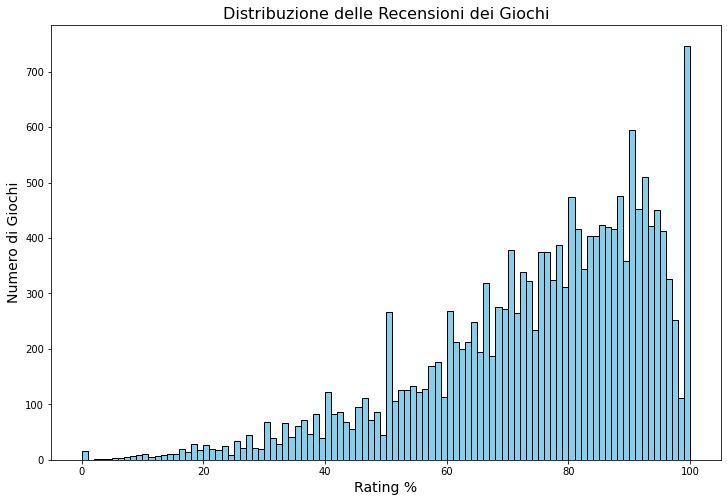

In [15]:
import pathlib
import matplotlib.pyplot as plt
percorso_file_csv = 'data/rawData/steam_games_reviews.csv'
dataReviews = pd.read_csv(percorso_file_csv, usecols=["name", "percentage_positive_review"],)
plt.figure(figsize=(12, 8))

plt.hist(x=dataReviews["percentage_positive_review"], range=[0, 100], bins=100, color='skyblue', edgecolor='black')

plt.title('Distribuzione delle Recensioni dei Giochi', fontsize=16)
plt.ylabel('Numero di Giochi', fontsize=14)
plt.xlabel('Rating %', fontsize=14)
plt.show()

Il grafico sottostante elenca tutti i generi di giochi disponibili nel dataset dei giochi con il rispettivo numero di giochi.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

percorso_file_csv = 'data/rawData/steam_games.csv'
dataGames = pd.read_csv(percorso_file_csv, usecols=["genre"])

x = []

for i, row in dataGames.iterrows():
    if type(row["genre"]) is str:
        x = x + row["genre"].split(',')

uniqueGenre = list(set(x))

df = pd.DataFrame(columns=["genre", "count"])
for genre in uniqueGenre:
    df2 = pd.DataFrame(data=[[genre, x.count(genre)]], columns=["genre", "count"])
    df = pd.concat([df, df2], ignore_index=True)

df = df.sort_values(by="count", ascending=False)

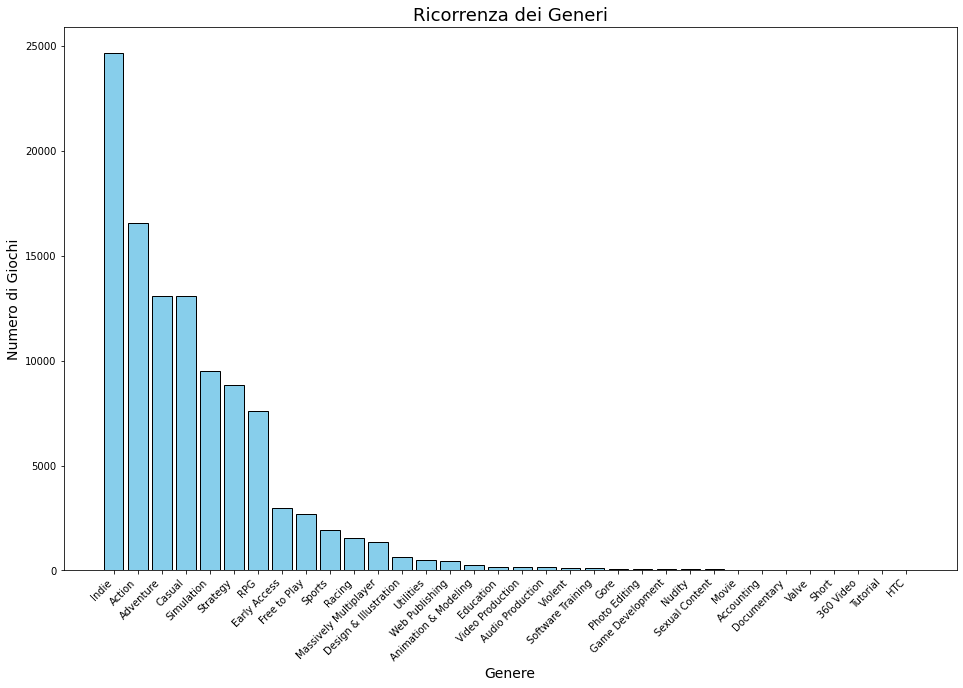

In [10]:
plt.figure(figsize=(16, 10))

plt.bar(df['genre'], df['count'], color='skyblue', edgecolor='black')

plt.title('Ricorrenza dei Generi', fontsize=18)
plt.xlabel('Genere', fontsize=14)
plt.ylabel('Numero di Giochi', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

Generiamo un grafico simile, mostrando le prime 20 etichette di giochi più popolari disponibili nel dataset dei giochi con il rispettivo numero di giochi.

In [11]:
dataGames = pd.read_csv(percorso_file_csv, usecols=["popular_tags"])

x = []

for i, row in dataGames.iterrows():
    if type(row["popular_tags"]) is str:
        x = x + row["popular_tags"].split(',')

uniqueGenre = list(set(x))

df = pd.DataFrame(columns=["popular_tags", "count"])
for genre in uniqueGenre:
    df2 = pd.DataFrame(data=[[genre, x.count(genre)]], columns=["popular_tags", "count"])
    df = pd.concat([df, df2], ignore_index=True)

df = df.sort_values(by="count", ascending=False)
df = df.head(20)

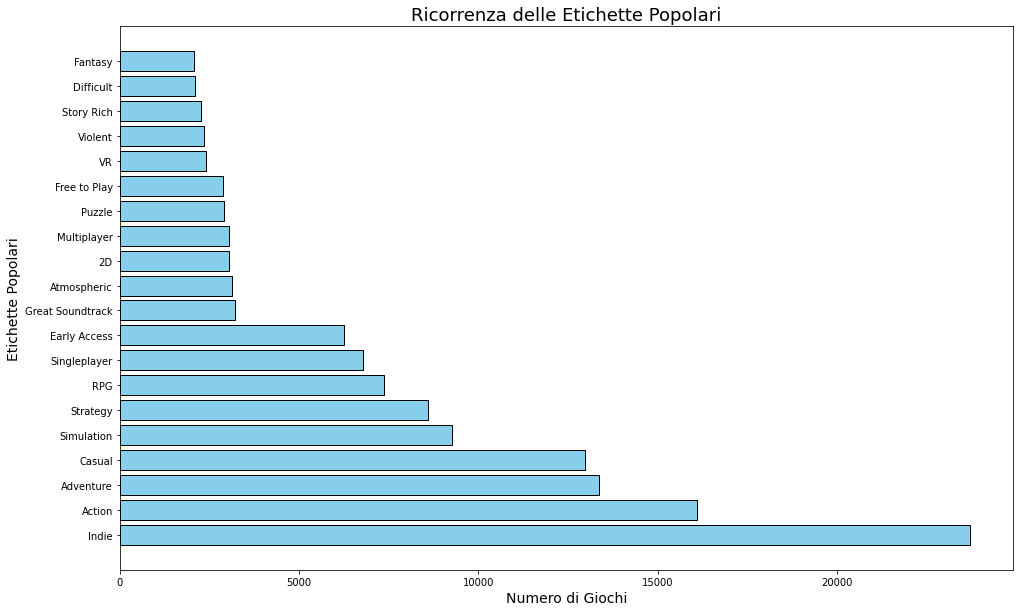

In [12]:
plt.figure(figsize=(16, 10))

ax = plt.barh(df['popular_tags'], df['count'], color='skyblue', edgecolor='black')

plt.title('Ricorrenza delle Etichette Popolari', fontsize=18)
plt.xlabel('Numero di Giochi', fontsize=14)
plt.ylabel('Etichette Popolari', fontsize=14)
plt.yticks(fontsize=10)

plt.show()

infine ecco un grafico che mostra i publisher con maggior numero di giochi creati e rating medio maggiore

In [13]:
percorso_file_csv = 'data/rawData/s_games.csv'
df = pd.read_csv(percorso_file_csv, usecols=["name","publisher","percentage_positive_review"])
df['publisher'] = df['publisher'].fillna('')
df['main_publisher'] = df['publisher'].apply(lambda x: x.split(',')[0])

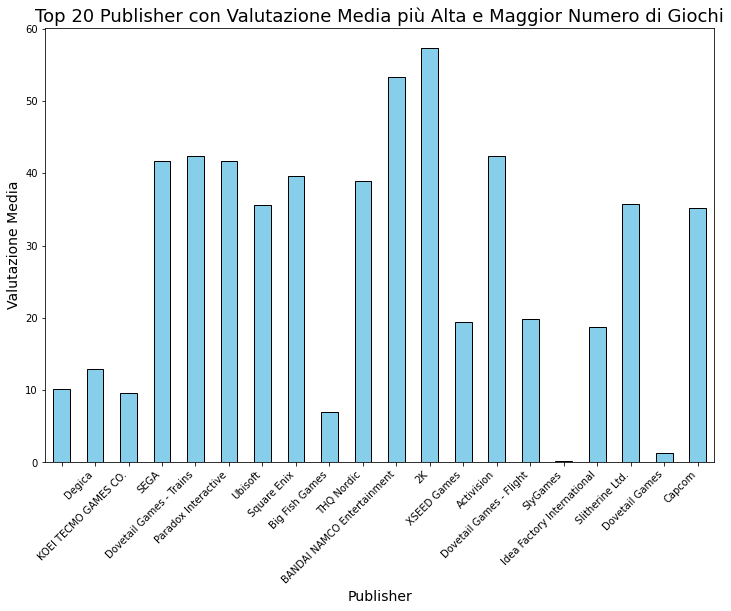

In [14]:
# Calcola la valutazione media e il numero di giochi per ciascun publisher
publisher_stats = df.groupby('main_publisher').agg({'percentage_positive_review': 'mean', 'name': 'count'}).sort_values(by='name', ascending=False)

# Filtra per i primi 20 publisher con il maggior numero di giochi
top_20_publishers = publisher_stats.head(20)

plt.figure(figsize=(12, 8))

top_20_publishers['percentage_positive_review'].plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 20 Publisher con Valutazione Media più Alta e Maggior Numero di Giochi', fontsize=18)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Valutazione Media', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()